In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import torch
import seaborn as sns
import matplotlib.pyplot as plt

import utils

In [8]:
utils.logging.basic_config()

INFO: utils.timeit: Time in block 1: 0.0090 seconds
INFO: utils.timeit: Time in block 2: 0.0109 seconds


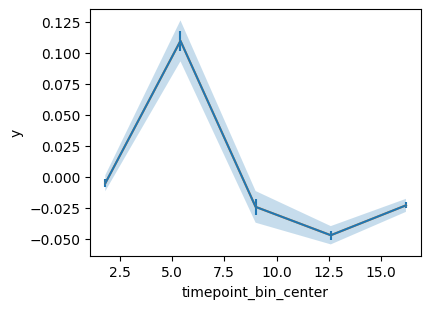

In [17]:
df = sns.load_dataset('fmri')
signal_err = np.abs(np.random.normal(size=len(df['signal'])))
signal_err[np.arange(100)] = np.nan
df['signal_err'] = signal_err
# print(df['timepoint'])
# sns.lineplot(df, x='timepoint', y='signal')
# utils.plot.lineplot(df, x='timepoint', y='signal', yerr='signal_err', weighted=True)

bins = 5

with utils.timeit.timeit('1'):
    result = utils.sp.stats.binned_mean(df['timepoint'], df['signal'], bins=bins, weighted=False)
    plt.errorbar(**result)

with utils.timeit.timeit('2'):
    df = utils.pd.digitize(df, column='timepoint', bins=bins)
    df = utils.pd.mean(df, by=['subject', 'timepoint_bin_center'], y='signal')
    # df = utils.pd.meanerr(df, by=['timepoint_bin_center'], y='signal', yerr='signalerr')
    df = utils.pd.meanerr(df.rename(columns={'signal': 'y', 'signalerr': 'yerr'}), by=['timepoint_bin_center'])
    # utils.plot.lineplot(df, x='timepoint_bin_center', y='signal', yerr='signalerr', weighted=False)
    utils.plot.lineplot(df, x='timepoint_bin_center', y='y', yerr='yerr', weighted=False)
# utils.pd.display(df)
plt.show()

[16.2 12.6  9.   1.8  5.4]
[-0.00934469 -0.1734388   0.15474943  0.31884355  0.48293766]


,subject,timepoint,event,region,signal,timepoint_bin_center,timepoint_bin_ledge,timepoint_bin_redge,signal_bin_center,signal_bin_ledge,signal_bin_redge
0,s13,18,stim,parietal,-0.0176,16.2000,14.4000,18.0000,-0.0093,-0.0914,0.0727
1,s5,14,stim,parietal,-0.0809,12.6000,10.8000,14.4000,-0.0093,-0.0914,0.0727
2,s12,18,stim,parietal,-0.0810,16.2000,14.4000,18.0000,-0.0093,-0.0914,0.0727
...,...,...,...,...,...,...,...,...,...,...,...
1061,s12,7,cue,frontal,-0.0049,5.4000,3.6000,7.2000,-0.0093,-0.0914,0.0727
1062,s11,7,cue,frontal,-0.0254,5.4000,3.6000,7.2000,-0.0093,-0.0914,0.0727
1063,s0,0,cue,parietal,-0.0069,1.8000,0.0000,3.6000,-0.0093,-0.0914,0.0727


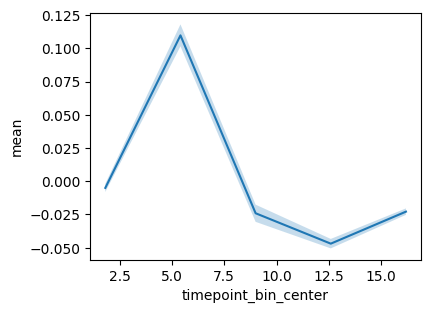

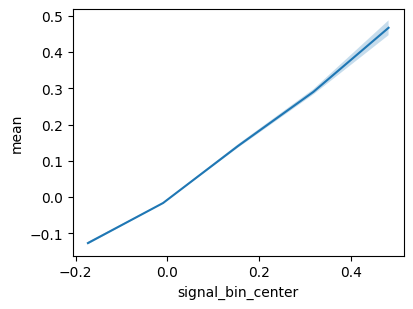

[16.2 12.6  9.   1.8  5.4] [nan 0.5]
[array([ 0. ,  3.6,  7.2, 10.8, 14.4, 18. ]), array([0., 1., 2., 3.])]


,subject,timepoint,event,region,signal
0,s13,16.2000,stim,parietal,NaN
1,s5,12.6000,stim,parietal,NaN
2,s12,16.2000,stim,parietal,NaN
...,...,...,...,...,...
1061,s12,5.4000,cue,frontal,NaN
1062,s11,5.4000,cue,frontal,NaN
1063,s0,1.8000,cue,parietal,NaN


,t,t_bin_center,t_bin_ledge,t_bin_redge
0,18,17.1,16.2,18.0
1,14,13.5,12.6,14.4
2,18,17.1,16.2,18.0
3,18,17.1,16.2,18.0
4,18,17.1,16.2,18.0
...,...,...,...,...
1059,8,8.1,7.2,9.0
1060,7,6.3,5.4,7.2
1061,7,6.3,5.4,7.2
1062,7,6.3,5.4,7.2


In [11]:
df = sns.load_dataset('fmri')

bins = 5

df = utils.pd.digitize(df, column=['timepoint', 'signal'], bins=bins)
assert (df['signal_bin_center'] == 0.5*(df['signal_bin_ledge'] + df['signal_bin_redge'])).all()
assert (df['timepoint_bin_center'] == 0.5*(df['timepoint_bin_ledge'] + df['timepoint_bin_redge'])).all()
assert (df['signal'] >= df['signal_bin_ledge']).all() and (df['signal'] <= df['signal_bin_redge']).all()
assert (df['timepoint'] >= df['timepoint_bin_ledge']).all() and (df['timepoint'] <= df['timepoint_bin_redge']).all()
print(df['timepoint_bin_center'].unique())
print(df['signal_bin_center'].unique())
utils.pd.display(df)

df_ = df.groupby('timepoint_bin_center').agg(
    mean=('signal', 'mean'),
    sem=('signal', 'sem'),
)
utils.plot.lineplot(df_, x='timepoint_bin_center', y='mean', yerr='sem', weighted=False)
plt.show()

df_ = df.groupby('signal_bin_center').agg(
    mean=('signal', 'mean'),
    sem=('signal', 'sem'),
)
utils.plot.lineplot(df_, x='signal_bin_center', y='mean', yerr='sem', weighted=False)
plt.show()

df = sns.load_dataset('fmri')

bins = [5,[0,1,2,3]]

df, edges = utils.pd.digitize(df, column=['timepoint', 'signal'], new_cols=False, bins=bins)
print(df['timepoint'].unique(), df['signal'].unique())
print(edges)
utils.pd.display(df)

df = sns.load_dataset('fmri')
utils.pd.digitize(df['timepoint'], colname='t')

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/fmri.csv")
data['complex data'] = data['signal'] + 1.0j*data['signal']
data['np data'] = [np.ones((3,2)) for _ in range(len(data))]
data['torch data'] = [torch.ones((3,2)) for _ in range(len(data))]
data['tuple data'] = [tuple(['a', 1, 2.0, [1,2,3], (2,3), {'k': 'v'}, torch.ones(2), np.ones(2)]) for _ in range(len(data))]
data['list data'] = [['a', 1, 2.0, [1,2,3], (2,3), {'k': 'v'}, torch.ones(2), np.ones(2)] for _ in range(len(data))]
data['dict data'] = [{str(i): v for i, v in enumerate(['a', 1, 2.0, [1,2,3], (2,3), {'k': 'v'}, torch.ones(2), np.ones(2)])} for _ in range(len(data))]

In [4]:
utils.pd.display(data, verbose=True)
utils.pd.display(data, verbose=False)
utils.pd.display(data, float_format='{:.2f}'.format)

,subject,timepoint,event,region,signal,complex data,np data,torch data,tuple data,list data,dict data
0,s13,18,stim,parietal,-0.0176,-0.0176-0.0176j,"np.ndarray (3, 2) (float64)","torch.Tensor (3, 2) (torch.float32)","tuple (8) ('str', 'int', 'float', 'list', 'tuple', 'dict', 'Tensor', 'ndarray')","list (8) ['str', 'int', 'float', 'list', 'tuple', 'dict', 'Tensor', 'ndarray']","dict (8) {'0': 'str', '1': 'int', '2': 'float', '3': 'list', '4': 'tuple', '5': 'dict', '6': 'Tensor', '7': 'ndarray'}"
1,s5,14,stim,parietal,-0.0809,-0.0809-0.0809j,"np.ndarray (3, 2) (float64)","torch.Tensor (3, 2) (torch.float32)","tuple (8) ('str', 'int', 'float', 'list', 'tuple', 'dict', 'Tensor', 'ndarray')","list (8) ['str', 'int', 'float', 'list', 'tuple', 'dict', 'Tensor', 'ndarray']","dict (8) {'0': 'str', '1': 'int', '2': 'float', '3': 'list', '4': 'tuple', '5': 'dict', '6': 'Tensor', '7': 'ndarray'}"
2,s12,18,stim,parietal,-0.0810,-0.0810-0.0810j,"np.ndarray (3, 2) (float64)","torch.Tensor (3, 2) (torch.float32)","tuple (8) ('str', 'int', 'float', 'list', 'tuple', 'dict', 'Tensor', 'ndarray')","list (8) ['str', 'int', 'float', 'list', 'tuple', 'dict', 'Tensor', 'ndarray']","dict (8) {'0': 'str', '1': 'int', '2': 'float', '3': 'list', '4': 'tuple', '5': 'dict', '6': 'Tensor', '7': 'ndarray'}"
...,...,...,...,...,...,...,...,...,...,...,...
1061,s12,7,cue,frontal,-0.0049,-0.0049-0.0049j,"np.ndarray (3, 2) (float64)","torch.Tensor (3, 2) (torch.float32)","tuple (8) ('str', 'int', 'float', 'list', 'tuple', 'dict', 'Tensor', 'ndarray')","list (8) ['str', 'int', 'float', 'list', 'tuple', 'dict', 'Tensor', 'ndarray']","dict (8) {'0': 'str', '1': 'int', '2': 'float', '3': 'list', '4': 'tuple', '5': 'dict', '6': 'Tensor', '7': 'ndarray'}"
1062,s11,7,cue,frontal,-0.0254,-0.0254-0.0254j,"np.ndarray (3, 2) (float64)","torch.Tensor (3, 2) (torch.float32)","tuple (8) ('str', 'int', 'float', 'list', 'tuple', 'dict', 'Tensor', 'ndarray')","list (8) ['str', 'int', 'float', 'list', 'tuple', 'dict', 'Tensor', 'ndarray']","dict (8) {'0': 'str', '1': 'int', '2': 'float', '3': 'list', '4': 'tuple', '5': 'dict', '6': 'Tensor', '7': 'ndarray'}"
1063,s0,0,cue,parietal,-0.0069,-0.0069-0.0069j,"np.ndarray (3, 2) (float64)","torch.Tensor (3, 2) (torch.float32)","tuple (8) ('str', 'int', 'float', 'list', 'tuple', 'dict', 'Tensor', 'ndarray')","list (8) ['str', 'int', 'float', 'list', 'tuple', 'dict', 'Tensor', 'ndarray']","dict (8) {'0': 'str', '1': 'int', '2': 'float', '3': 'list', '4': 'tuple', '5': 'dict', '6': 'Tensor', '7': 'ndarray'}"


,subject,timepoint,event,region,signal,complex data,np data,torch data,tuple data,list data,dict data
0,s13,18,stim,parietal,-0.0176,-0.0176-0.0176j,"(3, 2)","(3, 2)",tuple (8),list (8),dict (8)
1,s5,14,stim,parietal,-0.0809,-0.0809-0.0809j,"(3, 2)","(3, 2)",tuple (8),list (8),dict (8)
2,s12,18,stim,parietal,-0.0810,-0.0810-0.0810j,"(3, 2)","(3, 2)",tuple (8),list (8),dict (8)
...,...,...,...,...,...,...,...,...,...,...,...
1061,s12,7,cue,frontal,-0.0049,-0.0049-0.0049j,"(3, 2)","(3, 2)",tuple (8),list (8),dict (8)
1062,s11,7,cue,frontal,-0.0254,-0.0254-0.0254j,"(3, 2)","(3, 2)",tuple (8),list (8),dict (8)
1063,s0,0,cue,parietal,-0.0069,-0.0069-0.0069j,"(3, 2)","(3, 2)",tuple (8),list (8),dict (8)


,subject,timepoint,event,region,signal,complex data,np data,torch data,tuple data,list data,dict data
0,s13,18,stim,parietal,-0.02,-0.02-0.02j,"(3, 2)","(3, 2)",tuple (8),list (8),dict (8)
1,s5,14,stim,parietal,-0.08,-0.08-0.08j,"(3, 2)","(3, 2)",tuple (8),list (8),dict (8)
2,s12,18,stim,parietal,-0.08,-0.08-0.08j,"(3, 2)","(3, 2)",tuple (8),list (8),dict (8)
...,...,...,...,...,...,...,...,...,...,...,...
1061,s12,7,cue,frontal,-0.00,-0.00-0.00j,"(3, 2)","(3, 2)",tuple (8),list (8),dict (8)
1062,s11,7,cue,frontal,-0.03,-0.03-0.03j,"(3, 2)","(3, 2)",tuple (8),list (8),dict (8)
1063,s0,0,cue,parietal,-0.01,-0.01-0.01j,"(3, 2)","(3, 2)",tuple (8),list (8),dict (8)
